# Initialization

I imported pytorch here ... if you're more familiar with TF/Keras/Theano/etc, let's import those libraries

In [ ]:
#  For using SHAP --- Start :
!pip install tensorflow==1.15.2 --user
!pip install keras==2.2.2 --user
!pip install shap

%tensorflow_version 1.x

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional, BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D, MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.utils import np_utils
import shap
# Untill here 


# import keras
# from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional
# from keras import layers
# from keras.layers import BatchNormalization, Activation, ZeroPadding2D
# from keras.layers.advanced_activations import LeakyReLU
# from keras.models import Sequential, Model
# # from keras.optimizers import Adam
# from keras.utils import np_utils
# from keras.callbacks import EarlyStopping
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# from keras.layers.convolutional import Conv1D
# from keras.layers.pooling import MaxPool1D, MaxPooling1D
# from keras.layers.core import Flatten

# !pip install hpelm
# import hpelm

import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io as sio
from scipy.stats import kurtosis
from scipy import signal
from sklearn.model_selection import train_test_split
from  sklearn.utils import shuffle
from os import path, mkdir
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as utils
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import itertools
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import urllib.request
!pip install komm
import komm
import sys
import glob
import os

     |████████████████████████████████| 110.5 MB 27 kB/s 
     |████████████████████████████████| 3.8 MB 31.9 MB/s 
     |████████████████████████████████| 503 kB 40.2 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d3e038d6ada8a0b7a5fe5c897afe46c28db24004737b740078bc1a1ba1967ce3
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is in

Using TensorFlow backend.


     |████████████████████████████████| 50 kB 2.8 MB/s 
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56608 sha256=3edfa27736f13ba8b47fc16fae3dc22cad4ff5d3c24e7ac05eac6d10b696611b
  Stored in directory: /root/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built komm


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = 100 * (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()


classes = ['Baseline', 'Inner', 'Ball', 'Outer 1', 'Outer 2', 'Outer 3']

# Downloading the Data
In this part we download the raw data from the online repository.

In [ ]:
def make_dir(dir):
  if not path.exists(dir):
      mkdir(dir)
      print(dir + ' is created!')
  else: print(dir + ' exists!')
  return 

data_dir = '/content/data/'
make_dir(data_dir)


/content/data/ is created!


In [ ]:
!rm -r /content/data

In [ ]:
data_codes = {'97': {'class':0, 'rpm':1797}, '98':{'class':0, 'rpm':1772}, '99':{'class':0, 'rpm':1750}, '100': {'class':0, 'rpm':1730},
              '105':{'class':1, 'rpm':1797}, '106':{'class':1, 'rpm':1772}, '107':{'class':1, 'rpm':1750}, '108':{'class':1, 'rpm':1730},
              '209':{'class':1, 'rpm':1797}, '210':{'class':1, 'rpm':1772}, '211':{'class':1, 'rpm':1750}, '212':{'class':1, 'rpm':1730},
              '118':{'class':2, 'rpm':1797}, '120':{'class':2, 'rpm':1750}, '121':{'class':2, 'rpm':1730},
              '130':{'class':3, 'rpm':1797}, '131':{'class':3, 'rpm':1772}, '132':{'class':3, 'rpm':1750},
              '156':{'class':5, 'rpm':1797}, '158':{'class':5, 'rpm':1772}, '159':{'class':5, 'rpm':1750}, '160':{'class':5, 'rpm':1730},
              '198':{'class':3, 'rpm':1772}, '199':{'class':3, 'rpm':1750}, 
              '144':{'class':4, 'rpm':1797}, '145':{'class':4, 'rpm':1772}, '146':{'class':4, 'rpm':1750},} # keys: data codes in CWRU website  [IT'S ONLY SOME OF THE WHOLE DATA]

dir = []

for k,v in data_codes.items():
  print('k =', k, ' | ', v)
  if path.isfile(data_dir + k + '.mat'): pass  # if it is already downloaded
  else:
    urllib.request.urlretrieve(f"http://engineering.case.edu/sites/default/files/{k}.mat",
                               data_dir + k + '.mat')
  
  data = scipy.io.loadmat(data_dir + k + '.mat')
  if len(k) == 2: k_3 = '0'+k
  elif len(k) == 3: k_3 = k
  de = f'X{k_3}_DE_time'
  fe = f'X{k_3}_FE_time'
  
  dir.append([data_dir + k + '.mat' ,de, fe, v])
print('=== download complete! ===')

k = 97  |  {'class': 0, 'rpm': 1797}
k = 98  |  {'class': 0, 'rpm': 1772}
k = 99  |  {'class': 0, 'rpm': 1750}
k = 100  |  {'class': 0, 'rpm': 1730}
k = 105  |  {'class': 1, 'rpm': 1797}
k = 106  |  {'class': 1, 'rpm': 1772}
k = 107  |  {'class': 1, 'rpm': 1750}
k = 108  |  {'class': 1, 'rpm': 1730}
k = 209  |  {'class': 1, 'rpm': 1797}
k = 210  |  {'class': 1, 'rpm': 1772}
k = 211  |  {'class': 1, 'rpm': 1750}
k = 212  |  {'class': 1, 'rpm': 1730}
k = 118  |  {'class': 2, 'rpm': 1797}
k = 120  |  {'class': 2, 'rpm': 1750}
k = 121  |  {'class': 2, 'rpm': 1730}
k = 130  |  {'class': 3, 'rpm': 1797}
k = 131  |  {'class': 3, 'rpm': 1772}
k = 132  |  {'class': 3, 'rpm': 1750}
k = 156  |  {'class': 5, 'rpm': 1797}
k = 158  |  {'class': 5, 'rpm': 1772}
k = 159  |  {'class': 5, 'rpm': 1750}
k = 160  |  {'class': 5, 'rpm': 1730}
k = 198  |  {'class': 3, 'rpm': 1772}
k = 199  |  {'class': 3, 'rpm': 1750}
k = 144  |  {'class': 4, 'rpm': 1797}
k = 145  |  {'class': 4, 'rpm': 1772}
k = 146  |  {'c

# Dataset generating
In this section we have to randomly collect samples and make a dataset which then can be split to "train", "test" and "val". # THE test SET SHOULDN'T HAVE ANY OVERLAP WITH THE train/val SETS.

In [ ]:
def noise_maker(data, snr=0.1, signal_power=1.0):
    awgn = komm.AWGNChannel(snr=snr, signal_power=signal_power)
    return awgn(data)

def burst_maker(Input, stride=10, length=200, snr=100.):
    """
    :param Input: The raw signal of each sensor. (Numpy array: )
    :param stride: The interval between each sample (integer number) - by default = 10
    :param length: The length of the burst (integer number) - by default = 200
    :return: A numpy array with processed signal
    """
    if stride < length:
        r = int(np.floor((len(Input) - length + stride) / stride))  # r = number of bursts
    else:
        r = int(np.floor(len(Input) / stride))  # r = number of bursts

    Input = np.reshape(Input, (-1,))  # to make sure it's a vertical numpy vector
    Output = np.zeros((r, 1, length))  # makes a 3d matrix with all zero values

    for i in range(r):
        start = int(i * stride)  # starting timestamp
        burst = Input[start: start + length]  # the current burst on which we process
        if snr:  # None: without noise
          burst = noise_maker(burst, snr=snr, signal_power=1.0)

        Output[i, 0, :] = burst

    return Output

def splitter(X, y, test_size=0.2):
    m = len(y)
    if test_size <= 1:
        n = int(test_size * m)
    else:
        n = int(test_size)
    y_test = y[-n:]
    y_train = y[0:(m - n)]
    X_test = X[-n:, :, :]
    X_train = X[0:(m - n), :, :]
    return X_train, X_test, y_train, y_test

def print_percent_done(index, total, bar_len=50, title='Please wait'):
    '''
    index is expected to be 0 based index. 
    0 <= index < total
    '''
    percent_done = (index+1)/total*100
    percent_done = round(percent_done, 1)

    done = round(percent_done/(100/bar_len))
    togo = bar_len-done

    done_str = '█'*int(done)
    togo_str = '░'*int(togo)

    print(f'\t⏳{title}: [{done_str}{togo_str}] {percent_done}% done')

    if round(percent_done) == 100:
        print('\t✅')

def DataLoader(dir, length=200, stride=100, train_size=.8, val_size=.1, snr=None, save=False, load=False, file_name='Temporary.npz', file_dir=''):
    """
    :param dir: [The directory of the .mat file, name of DE header, name of FE header, label]
    :param length: Length of the burst: int
    :param stride: Timestamp between bursts: int
    :param train_size: proportion of the whole dataset to be used as training set
    :param val_size: proportion of non-training set to be used as evaluation set
    :param noise: Random noise severity (real number between 0.0 and 1.0)
    :param save: If it's True, it saves the file into an .NPZ file
    :param load: If it's True, it loads the file from an .NPZ file
    :param file_name: The name of an .NPZ file to be loaded or saved
    :param file_dir: The directory of the final .NPZ file to be loaded from / saved to
    :return: X_trian, X_test, X_val, y_train, y_test, y_val: numpy array
    """
    if load == True:
        A = np.load(file_dir + file_name)
        X_train, X_test, X_val, y_train, y_test, y_val = \
            A['name1'], A['name2'], A['name3'], A['name4'], A['name5'], A['name6']
        print('=== ' ,file_name, 'is loaded ===')
    else:
        j = 0
        
        for d, n1, n2, label in dir:
            A = sio.loadmat(d)
            class_i = np.concatenate([A[n1], A[n2]], axis=1)  # allocates the sensor data to each column
            print_percent_done(j, len(glob.glob(f'{file_dir}*.mat')), bar_len=50, title='Creating the dataset')

            h_train = class_i[:int(len(class_i) * train_size), :]  # returns the first 80% of class_i data timestamps
            h_test = class_i[int(len(class_i) * train_size):, :]  # returns the last 20% of class_i data timestamps

            X_tr = burst_maker(h_train[:, 0], stride=stride, length=length, snr=snr)  # the first sensor's processed data
            for i in np.arange(start=1, stop=len(h_train[0, :])):  # the remaining sensors
                a = burst_maker(h_train[:, i], stride=stride, length=length, snr=snr)
                X_tr = np.concatenate([X_tr, a], axis=1)
            y_tr = np.full((len(X_tr), 1), label['class'])  # labels class_i samples with 0

            X_te = burst_maker(h_test[:, 0], stride=stride, length=length, snr=snr)  # the first sensor's processed data
            for i in np.arange(start=1, stop=len(h_test[0, :])):  # the remaining sensors
                a = burst_maker(h_test[:, i], stride=stride, length=length, snr=snr)
                X_te = np.concatenate([X_te, a], axis=1)
            y_te = np.full((len(X_te), 1), label['class'])  # labels class_i samples with 0

            if j == 0:
                X_train = X_tr
                y_train = y_tr
                X_test = X_te
                y_test = y_te
            else:
                X_train = np.concatenate([X_train, X_tr])
                y_train = np.concatenate([y_train, y_tr])
                X_test = np.concatenate([X_test, X_te])
                y_test = np.concatenate([y_test, y_te])

            j += 1

            X_train, y_train = shuffle(X_train, y_train)  # only shuffles

            X_test, y_test = shuffle(X_test, y_test)  # only shuffles

            X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_size, shuffle=True)  # only shuffles

        if save == True:
            np.savez(file_dir + file_name, name1=X_train, name2=X_test, name3=X_val,
                     name4=y_train, name5=y_test, name6=y_val)
            print('=== ', file_name, 'is successfully saved ===!')

    return X_train, X_test, X_val, y_train, y_test, y_val

In [ ]:
stride = 250  # stride
length = int(4096/16)
snr = 50  # signal to noise ratio (None or float)
train_size = 0.8  # ratio of training set to whole (between 0 and 1)
val_size = 0.05  # ratio of training set to whole (between 0 and 1)
file_dir='./data/'
if snr:
  file_name = f'S{stride}L{length}snr{int(snr)}.npz'
else:
  file_name = f'S{stride}L{length}.npz'

X_train, X_test, X_val, y_train, y_test, y_val = DataLoader(dir, length=length, stride=stride,
                                                            train_size=train_size, val_size=val_size, snr=snr,
                                                            save=True, load=False, file_name=file_name, file_dir=file_dir)

	⏳Creating the dataset: [██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 3.7% done
	⏳Creating the dataset: [████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 7.4% done
	⏳Creating the dataset: [██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 11.1% done
	⏳Creating the dataset: [███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 14.8% done
	⏳Creating the dataset: [█████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 18.5% done
	⏳Creating the dataset: [███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 22.2% done
	⏳Creating the dataset: [█████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 25.9% done
	⏳Creating the dataset: [███████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 29.6% done
	⏳Creating the dataset: [█████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 33.3% done
	⏳Creating the dataset: [██████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 37.0% done
	⏳Creating the dataset: [████████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░] 40.7% done
	⏳Creating the dataset: [█████████

In [ ]:
print(f'Shapes: X train:{X_train.shape} - X val:{X_val.shape} - X test:{X_test.shape}')
print(f'Shapes: y train:{y_train.shape} - y val:{y_val.shape} - y test:{y_test.shape}')
print(f'{file_name} size: {os.path.getsize(file_dir+file_name)/1e6} MB')

Shapes: X train:(14398, 2, 256) - X val:(87, 2, 256) - X test:(1642, 2, 256)
Shapes: y train:(14398, 1) - y val:(87, 1) - y test:(1642, 1)
S250L256snr50.npz size: 66.186682 MB


#Data Preprocessing

Feature extraction, Signal processing, dimension reduction (possibly!), denoising (if needed)  -- These features may be used in different architectures provided in the next section.

this is a sample picker to just have a sample to see if the preprocessing techniques work.

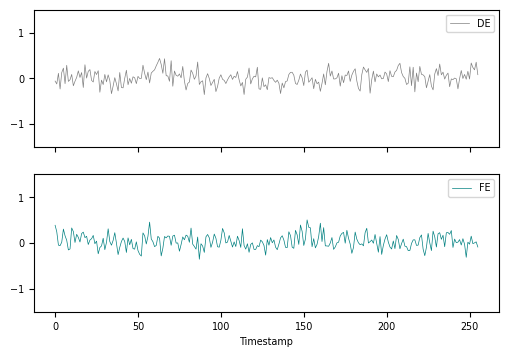

In [ ]:
r = np.random.randint(0, len(X_train[:,0,0]))
signal_de = X_train[r,0,:]
signal_fe = X_train[r,1,:]

i = 0
d = {'DE':signal_de, 'FE':signal_fe}
colors = {'DE':'gray', 'FE':'teal'}
for k, sig in d.items():
  plt.figure(2, dpi=100)
  plt.rcParams.update({
    "figure.facecolor":  (1, 1, 1, 1),  # white   with alpha = 100%
    "axes.facecolor":    (1, 1, 1, 1),
    "savefig.facecolor": (1, 1, 1, 1),
  })
  ax = plt.subplot(2, 1, i+1)
  ax.plot(range(len(sig)), sig, c=colors[k], lw=.5, label=k)
  # plt.title(f'Noisy Signal - SNR:{snr}')
  ax.legend(fontsize ='x-small', loc='upper right')
  plt.yticks(fontsize='x-small', rotation=0)
  plt.xticks(fontsize='x-small', rotation=0)

  # ax.set_ylabel(f'{k}')
  if k=='DE':
    # plt.ylim([-2.8,2.8])
    plt.ylim([-1.5,1.5])
    ax.set_xticklabels([])
  else:
    plt.ylim([-1.5,1.5])
    ax.set_xlabel('Timestamp', fontsize='x-small')
  i += 1
plt.show()

## EMD (classes and functions)

In [ ]:
# <<Seyi>> provides some signal processing feature extraction techniques here

In [ ]:
# EEMD:
! pip install EMD-signal

     |████████████████████████████████| 42 kB 317 kB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 81 kB 7.5 MB/s 
     |████████████████████████████████| 65 kB 2.9 MB/s 


In [ ]:
from PyEMD import EMD

In [ ]:
# <<Mass>> provides some visualizations

# DL Architectures

We develop some state-of-the-art as well as classic architectures here to compare their performance on the dataset.

## Some architectures from the literature

importing Keras / TF libraries and dependencies

In [ ]:
# <<Ardeshir>> <<Todd>> <<Maryam>> <<Mass>> provide the architectures here

### ConvLSTM

In [ ]:
# LSTM

# Create model
input_shape = (X_train.shape[2],X_train.shape[1])

left_input = Input(input_shape)
model_convlstm = Sequential()

# WDCNN architecture
model_convlstm.add(Conv1D(filters=16, kernel_size=64, strides=16, padding='same',input_shape=input_shape))
model_convlstm.add(BatchNormalization())
model_convlstm.add(Activation("relu"))
model_convlstm.add(MaxPooling1D(strides=2))

model_convlstm.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same'))
model_convlstm.add(BatchNormalization())
model_convlstm.add(Activation("relu"))
model_convlstm.add(MaxPooling1D(strides=2))

model_convlstm.add(LSTM(units=64,))

model_convlstm.add(Dense(100,activation='sigmoid'))

model_convlstm.add(Dropout(0.5))
model_convlstm.add(Dense(6, activation = 'softmax'))
print(model_convlstm.summary())


print(model_convlstm.count_params())

# initialize optimizer and random generator within one fold
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=156324)
# keras.optimizers.SGD(lr=0.01)
model_convlstm.compile(optimizer='adam',
                      loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16, 16)            2064      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16)            64        
_________________________________________________________________
activation (Activation)      (None, 16, 16)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 32)             1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 32)             128       
_________________________________________

### CNN

In [ ]:
# Create model
input_shape = (X_train.shape[2],X_train.shape[1])

left_input = Input(input_shape)
model_cnn = Sequential()

# WDCNN architecture
model_cnn.add(Conv1D(filters=16, kernel_size=64, strides=16, padding='same',input_shape=input_shape))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling1D(strides=2))

model_cnn.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling1D(strides=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling1D(strides=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation("relu"))
model_cnn.add(MaxPooling1D(strides=2))

model_cnn.add(Flatten())
model_cnn.add(Dense(100,activation='sigmoid'))

model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(6, activation = 'softmax'))
print(model_cnn.summary())


print(model_cnn.count_params())

# initialize optimizer and random generator within one fold
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=156324)
# keras.optimizers.SGD(lr=0.01)
model_cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 16, 16)            2064      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16)            64        
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 32)             1568      
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 32)             128       
_________________________________________________________________
activation_3 (Activation)    (None, 8, 32)            

## The proposed architectures (ours)

In [ ]:
# Let's be innovative enough!

#Model training

Here based on different RPMs, SNRs and Imbalanced severity, we have different datasets; We need to take an architecture and train it on a given dataset.
Inputs: [DL model] [dataset] [dataset condition] [hyperparameters]

Don't forget to save the trained model somewhere on the google drive (plus its runtime with GPU/CPU info and parameters) -- we don't want to run one model over and over.

## ConvLSTM

In [ ]:
n_class = 6

# Earlystopping callback
earlystop = EarlyStopping(monitor= 'val_loss', min_delta=0 , patience=30, verbose=0, mode='auto')


# Fit the model

model_cnn.fit(X_train.transpose(0,2,1), np_utils.to_categorical(y_train, n_class),
                   validation_data = (X_val.transpose(0,2,1),np_utils.to_categorical(y_val, n_class)), epochs=5, batch_size=32, verbose=1, 
                   callbacks =[earlystop], shuffle = True)


Train on 14398 samples, validate on 87 samples
Epoch 1/5
14398/14398 [==============================] - 4s 293us/sample - loss: 0.5875 - acc: 0.7941 - val_loss: 0.3294 - val_acc: 0.8851
Epoch 2/5
14398/14398 [==============================] - 3s 242us/sample - loss: 0.1919 - acc: 0.9367 - val_loss: 0.1365 - val_acc: 0.9425
Epoch 3/5
14398/14398 [==============================] - 3s 237us/sample - loss: 0.1084 - acc: 0.9673 - val_loss: 0.0507 - val_acc: 0.9770
Epoch 4/5
14398/14398 [==============================] - 3s 242us/sample - loss: 0.0652 - acc: 0.9805 - val_loss: 0.1003 - val_acc: 0.9770
Epoch 5/5
14398/14398 [==============================] - 4s 289us/sample - loss: 0.0651 - acc: 0.9805 - val_loss: 0.0798 - val_acc: 0.9770


In [ ]:
n_class = 6

# Earlystopping callback
earlystop = EarlyStopping(monitor= 'val_loss', min_delta=0 , patience=30, verbose=0, mode='auto')


model_cnn.fit(X_train.transpose(0,2,1), np_utils.to_categorical(y_train, n_class),
                   validation_data = (X_val.transpose(0,2,1),np_utils.to_categorical(y_val, n_class)), epochs=25, batch_size=32, verbose=1, 
                   callbacks =[earlystop], shuffle = True)

Train on 14398 samples, validate on 87 samples
Epoch 1/25
14398/14398 [==============================] - 9s 624us/sample - loss: 0.5784 - acc: 0.7984 - val_loss: 0.2516 - val_acc: 0.9310
Epoch 2/25
14398/14398 [==============================] - 6s 431us/sample - loss: 0.1795 - acc: 0.9428 - val_loss: 0.1584 - val_acc: 0.9310
Epoch 3/25
14398/14398 [==============================] - 4s 262us/sample - loss: 0.1188 - acc: 0.9633 - val_loss: 0.1128 - val_acc: 0.9655
Epoch 4/25
14398/14398 [==============================] - 4s 246us/sample - loss: 0.0921 - acc: 0.9702 - val_loss: 0.0726 - val_acc: 0.9655
Epoch 5/25
14398/14398 [==============================] - 4s 247us/sample - loss: 0.0587 - acc: 0.9827 - val_loss: 0.0742 - val_acc: 0.9655
Epoch 6/25
14398/14398 [==============================] - 4s 243us/sample - loss: 0.0601 - acc: 0.9814 - val_loss: 0.0625 - val_acc: 0.9655
Epoch 7/25
14398/14398 [==============================] - 4s 246us/sample - loss: 0.0432 - acc: 0.9876 - val_loss

In [ ]:
y_train[0]

array([0])

In [ ]:
print(model_cnn.predict(X_test[:1].transpose(0,2,1)))
print(np_utils.to_categorical(y_test, n_class)[:1])

[[1.4709556e-04 1.2981137e-03 5.4819120e-05 2.2469471e-04 9.9827003e-01
  5.1817447e-06]]
[[0. 0. 0. 0. 1. 0.]]


## Explainable AI for ConvLSTM Model

In [ ]:
print(tf.__version__)
X_train[:100].transpose(0,2,1).shape

# we use the first 100 training examples as our background dataset to integrate over

explainer = shap.GradientExplainer(model_cnn, X_train[:100].transpose(0,2,1))

# # explain the first 10 predictions
# # explaining each prediction requires 2 * background dataset size runs
shvalues = explainer.shap_values(X_test[:10].transpose(0,2,1))

1.15.2



In [ ]:
c0 = shvalues[0]
c1 = shvalues[1]
c2 = shvalues[2]
c3 = shvalues[3]
c4 = shvalues[4]
c5 = shvalues[5]

In [ ]:
min(c0[0,:,1])

-0.003518264042213559

In [ ]:
len(c0[0,:,1])

256

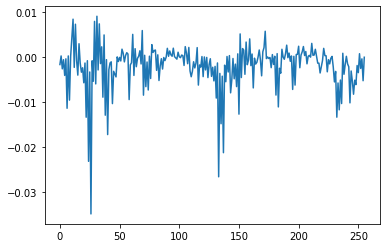

In [ ]:
plt.plot(c0[0,:,0])

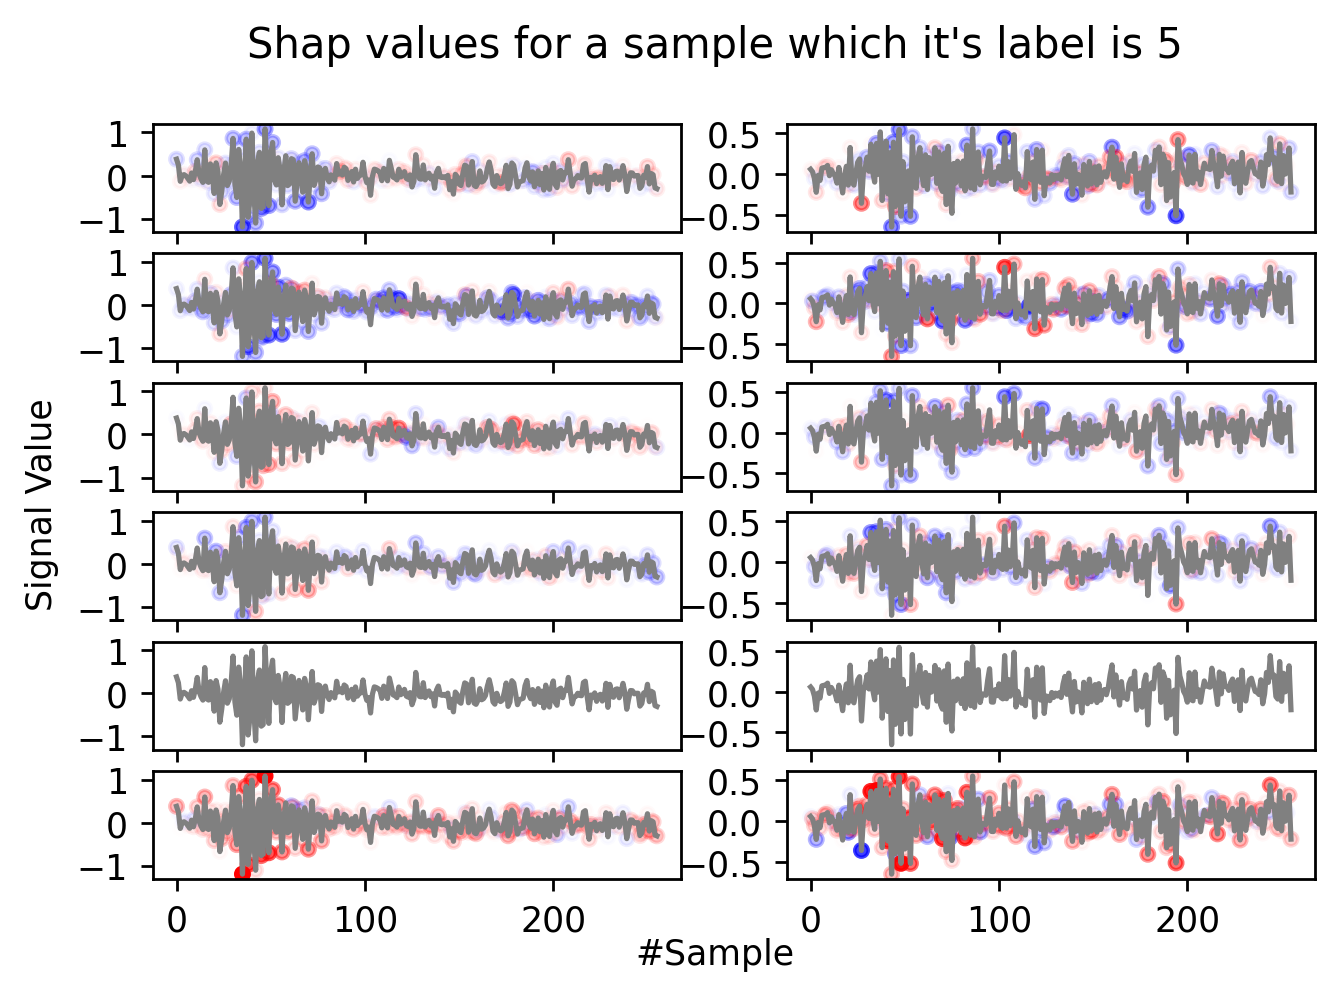

In [ ]:
sample = 2
feature = 0
fig, axs = plt.subplots(6,2, dpi=250)
fig.suptitle("Shap values for a sample which it's label is "+str(y_test[sample][0]))

fig.text(0.5, 0.04,'#Sample', ha='center')
fig.text(0.04, 0.5,'Signal Value', va='center', rotation='vertical')


for feature in range(2):

  overallMax = abs(max(list(c0[sample,:,feature])+list(c1[sample,:,feature])+list(c2[sample,:,feature])+list(c3[sample,:,feature])+list(c4[sample,:,feature])+list(c5[sample,:,feature]),key=abs))

  # print(y_test[0])

  for i in range(6):
    reds = []
    blues = []

    for value in shvalues[i][sample,:,feature]:
      if value >= 0:
        reds.append(abs(value)/overallMax)
        if abs(value)/overallMax > 1:
          print(value)
        blues.append(0)
      else:
        reds.append(0)
        blues.append(abs(value)/overallMax)

    y = np.arange(256)
    
    axs[i,feature].plot(y,X_test[sample,feature,:],color = "gray")
    
    # x = c0[0,:,1] #np.array([ v if v < 0 else 0 for v in c0[0,:,1]])
    x = X_test[sample,feature,:]
    y = np.arange(256)

    alphas = np.array(blues)
    rgba_colors = np.zeros((256,4))
    # for red the first column needs to be one
    rgba_colors[:,2] = 1
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas

    axs[i,feature].scatter(y, x, s = 15 ,color=rgba_colors)
    
    
    # -------------------
    # x = c0[0,:,1] #np.array([ v if v >= 0 else 0 for v in c0[0,:,1]])
    x = X_test[sample,feature,:]
    y = np.arange(256)

    alphas = np.array(reds)
    rgba_colors = np.zeros((256,4))
    # for red the first column needs to be one
    rgba_colors[:,0] = 1
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas

    axs[i,feature].scatter(y, x, s = 15 ,color=rgba_colors)


In [ ]:
# X_test[:,:,:].shape
# np.arange(256)[255]
max(reds)

1.6795992349528797

TypeError: ignored

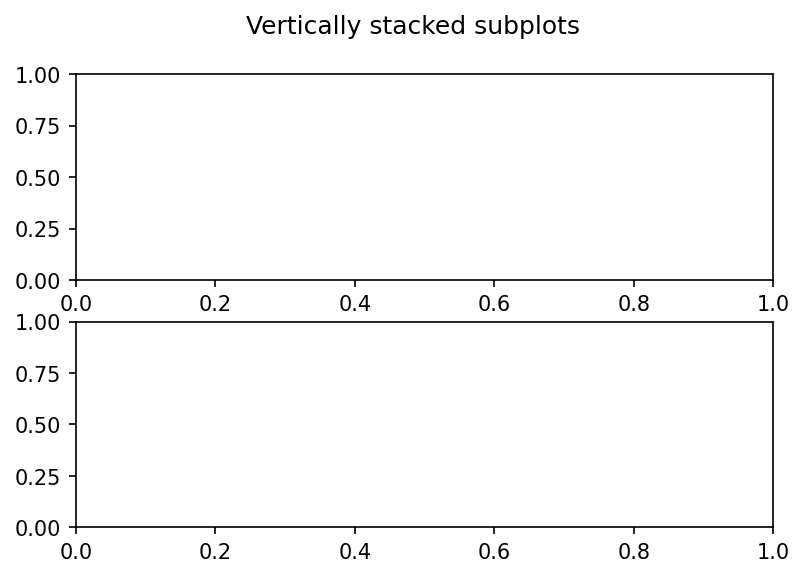

In [ ]:
fig, axs = plt.subplots(2, dpi=150)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(shvalues[0,:,1])
axs[1].plot(X_test[0,1,:])
axs[2].plot(shvalues[0,:,0])
axs[3].plot(X_test[0,0,:])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
accuracy score = 98.84287454323996 %
Confusion matrix, without normalization


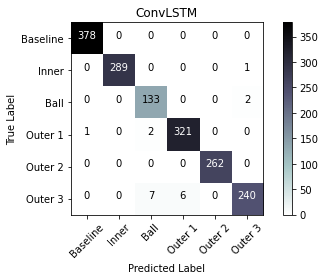

In [ ]:
# Test ConvLSTM
y_pred = model_convlstm.predict(X_test.transpose(0,2,1))
print(f'accuracy score = {accuracy_score(y_test, y_pred.argmax(1)) * 100} %')
cm = confusion_matrix(y_test, y_pred.argmax(1))
plot_confusion_matrix(cm, classes, normalize=False, title='ConvLSTM',cmap=plt.cm.bone_r)

## CNN

In [ ]:
n_class = 6
# Earlystopping callback
earlystop = EarlyStopping(monitor= 'val_loss', min_delta=0 , patience=30, verbose=0, mode='auto')


# Fit the model

model_cnn.fit(X_train.transpose(0,2,1), np_utils.to_categorical(y_train, n_class),
            validation_data = (X_val.transpose(0,2,1),np_utils.to_categorical(y_val, n_class)), epochs=25, batch_size=32, verbose=1, 
              callbacks =[earlystop], shuffle = True)

Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
444/450 [============================>.] - ETA: 0s - loss: 0.6492 - accuracy: 0.7717WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8ac6ec0e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
accuracy score = 98.41656516443362 %
Confusion matrix, without normalization


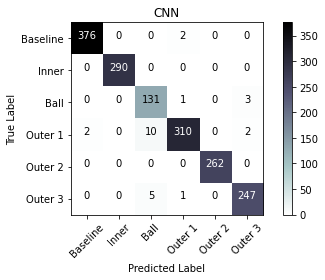

In [ ]:
# Test
y_pred = model_cnn.predict(X_test.transpose(0,2,1))
print(f'accuracy score = {accuracy_score(y_test, y_pred.argmax(1)) * 100} %')
cm = confusion_matrix(y_test, y_pred.argmax(1))
plot_confusion_matrix(cm, classes, normalize=False, title='CNN',cmap=plt.cm.bone_r)

In [ ]:
# a script that takes an architecture and trains it on a given dataset (the conditions can be different based on the SNR or imbalanced situation)

## Rolling Element Bearing Fault Detection Using Deep Learning
By: Alex Shenfield and Martin Howarth 

https://github.com/al3xsh/rolling-element-bearing-fault-detection

In [ ]:
!git clone https://github.com/al3xsh/rolling-element-bearing-fault-detection.git

Cloning into 'rolling-element-bearing-fault-detection'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 114 (delta 45), reused 97 (delta 35), pack-reused 0
Receiving objects: 100% (114/114), 1.28 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
# Requires older versions of tensorflow and keras
!pip install keras==2.3.1
!pip install tensorflow==2.1
# Make sure to restart the runtime after running this cell!

     |████████████████████████████████| 377 kB 4.2 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.3.1 which is incompatible.
     |████████████████████████████████| 421.8 MB 27 kB/s 
     |████████████████████████████████| 3.8 MB 39.7 MB/s 
     |████████████████████████████████| 448 kB 42.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=1a9bc1418aaf347941fd1c88ce3ea828d79224f5880b66673275c894f3b75a18
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tens

In [ ]:
#Check versions are correct!
import tensorflow
import keras
print('Tensorflow Version:', tensorflow.__version__)
print('Keras Version:', keras.__version__)

Tensorflow Version: 2.1.0
Keras Version: 2.3.1


Using TensorFlow backend.


In [ ]:
from __future__ import absolute_import
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine import Layer
from keras.legacy import interfaces
from keras.layers import RNN

import numpy as np

def _time_distributed_dense(x, w, b=None, dropout=None,
                            input_dim=None, output_dim=None,
                            timesteps=None, training=None):
    
    """Apply `y . w + b` for every temporal slice y of x.

    # Arguments
        x: input tensor.
        w: weight matrix.
        b: optional bias vector.
        dropout: whether to apply dropout (same dropout mask for every 
                 temporal slice of the input).
        input_dim: integer; optional dimensionality of the input.
        output_dim: integer; optional dimensionality of the output.
        timesteps: integer; optional number of timesteps.
        training: training phase tensor or boolean.

    # Returns
        Output tensor.
    """
    if not input_dim:
        input_dim = K.shape(x)[2]
    if not timesteps:
        timesteps = K.shape(x)[1]
    if not output_dim:
        output_dim = K.int_shape(w)[1]

    if dropout is not None and 0. < dropout < 1.:
        
        # apply the same dropout pattern at every timestep
        ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
        dropout_matrix = K.dropout(ones, dropout)
        expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
        x = K.in_train_phase(x * expanded_dropout_matrix, x, 
                             training=training)

    # collapse time dimension and batch dimension together
    x = K.reshape(x, (-1, input_dim))
    x = K.dot(x, w)
    if b is not None:
        x = K.bias_add(x, b)
        
    # reshape to 3D tensor
    if K.backend() == 'tensorflow':
        x = K.reshape(x, K.stack([-1, timesteps, output_dim]))
        x.set_shape([None, None, output_dim])
    else:
        x = K.reshape(x, (-1, timesteps, output_dim))
    return x


class AttentionGRUCell(Layer):
    
    """Cell class for the GRU layer with attention

    Updated for latest versions of Keras and Tensorflow so now follows
    the latest version of the Keras RNN cell pattern.

    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: sigmoid (`sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).x
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        reset_after: GRU convention (whether to apply reset gate after or
            before matrix multiplication). False = "before" (default),
            True = "after" (CuDNN compatible).
    """

    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 
                 attention_activation='tanh',
                 attention_initializer='orthogonal',
                 attention_regularizer=None,
                 attention_constraint=None,
                 
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 reset_after=False,
                 **kwargs):
        
        super(AttentionGRUCell, self).__init__(**kwargs)
        
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        
        # attention initialisation
        self.attention_activation = activations.get(attention_activation)
        self.attention_initializer = initializers.get(attention_initializer)
        self.attention_regularizer = regularizers.get(attention_regularizer)
        self.attention_constraint = constraints.get(attention_constraint)
        #

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.reset_after = reset_after
        
        self.state_size = self.units
        self.output_size = self.units
        self._dropout_mask = None
        self._recurrent_dropout_mask = None
        

    def build(self, input_shape):
        
        # set the number of timesteps to use in alignment of the attention 
        # model
        self.timestep_dim = 1
        
        self.input_dim = input_shape[-1]

        if type(self.recurrent_initializer).__name__ == 'Identity':
            def recurrent_identity(shape, gain=1., dtype=None):
                del dtype
                return gain * np.concatenate(
                    [np.identity(shape[0])] * (shape[1] // shape[0]), axis=1)

            self.recurrent_initializer = recurrent_identity

        self.kernel = self.add_weight(shape=(self.input_dim, self.units * 3),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        
        self.recurrent_kernel = \
            self.add_weight(shape=(self.units, self.units * 3),
                            name='recurrent_kernel',
                            initializer=self.recurrent_initializer,
                            regularizer=self.recurrent_regularizer,
                            constraint=self.recurrent_constraint)

        # add attention kernel
        self.attention_kernel = \
            self.add_weight(shape=(self.input_dim, self.units * 3),
                            name='attention_kernel',
                            initializer=self.attention_initializer,
                            regularizer=self.attention_regularizer,
                            constraint=self.attention_constraint)
                 
        # add attention weights and recurrent weights                           
        self.attention_weights = \
            self.add_weight(shape=(self.input_dim, self.units),
                            name='attention_w',
                            initializer=self.attention_initializer,
                            regularizer=self.attention_regularizer,
                            constraint=self.attention_constraint)

        self.attention_recurrent_weights = \
            self.add_weight(shape=(self.units, self.units),
                            name='attention_u',
                            initializer=self.recurrent_initializer,
                            regularizer=self.recurrent_regularizer,
                            constraint=self.recurrent_constraint)
        #####

        # initialise and add in the biases
        if self.use_bias:
            
            # form the bias shape depending on whether we are using the 
            # cudnngru compatibility (i.e. reset after matrix multiplication) 
            
            # not cudnn compatible ...
            if not self.reset_after:
                bias_shape = (3 * self.units,)                
            
            # cudnn compatible ...
            else:
                # separate biases for input and recurrent kernels
                # note: the shapes differ intentionally so we know what to do 
                # when loading weights
                bias_shape = (2, 3 * self.units)
                
            # initialise the biases using the appropriate initialisation 
            # routines
            self.bias = self.add_weight(shape=bias_shape,
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
            
            
            # initialise the attention biases
            self.attention_bias = self.add_weight(shape=(self.units,),
                                                  name='attention_b',
                                                  initializer=self.bias_initializer,
                                                  regularizer=self.bias_regularizer,
                                                  constraint=self.bias_constraint)

            self.attention_recurrent_bias = self.add_weight(shape=(self.units, 1),
                                                            name='attention_v',
                                                            initializer=self.bias_initializer,
                                                            regularizer=self.bias_regularizer,
                                                            constraint=self.bias_constraint)
                
            #####
            
            # if we are applying the reset gate _before_ matrix multiplication
            # (i.e. not cudnn compatible)
            if not self.reset_after:
                self.input_bias, self.recurrent_bias = self.bias, None
            
            # cudnn compatible ...
            else:
                # NOTE: need to flatten, since slicing in CNTK gives 2D array
                self.input_bias = K.flatten(self.bias[0])
                self.recurrent_bias = K.flatten(self.bias[1])
            
        else:
            self.bias = None
            self.attention_bias = None
            self.attention_recurrent_bias = None

        # gru gating weights ...

        # split out the appropriate parts of the gru kernel for the various 
        # gating mechanisms
        self.kernel_z = self.kernel[:, :self.units]
        self.kernel_r = self.kernel[:, self.units: self.units * 2]
        self.kernel_h = self.kernel[:, self.units * 2:]

        # split out the appropriate parts of the gru recurrent kernel for the  
        # various gating mechanisms
        self.recurrent_kernel_z = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_r = self.recurrent_kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_h = self.recurrent_kernel[:, self.units * 2:]    
        
        # split out the appropriate parts of the gru attention kernel for the  
        # various gating mechanisms
        self.attention_z = self.attention_kernel[:, :self.units]
        self.attention_r = self.attention_kernel[:, self.units: self.units * 2]
        self.attention_h = self.attention_kernel[:, self.units * 2:]
        #####
    
        # get the bias values for each gating mechanism
        if self.use_bias:
            self.bias_z = self.bias[:self.units]
            self.bias_r = self.bias[self.units: self.units * 2]
            self.bias_h = self.bias[self.units * 2:]
            
            # bias for hidden state - just for compatibility with CuDNN
            if self.reset_after:
                self.recurrent_bias_z = self.recurrent_bias[:self.units]
                self.recurrent_bias_r = self.recurrent_bias[self.units: self.units * 2]
                self.recurrent_bias_h = self.recurrent_bias[self.units * 2:]
            
        else:
            self.bias_z = None
            self.bias_r = None
            self.bias_h = None
            
            # bias for hidden state - just for compatibility with CuDNN
            if self.reset_after:
                self.recurrent_bias_z = None
                self.recurrent_bias_r = None
                self.recurrent_bias_h = None
            
        # ... and we're done :)
        self.built = True


    def call(self, inputs, states, training=None):
        
        # previous memory state for gru
        h_tm1 = states[0]  
        
        # generate our dropout and recurrent dropout masks
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                K.ones_like(inputs),
                self.dropout,
                training=training,
                count=4)
        if (0 < self.recurrent_dropout < 1 and
                self._recurrent_dropout_mask is None):
            self._recurrent_dropout_mask = _generate_dropout_mask(
                K.ones_like(states[0]),
                self.recurrent_dropout,
                training=training,
                count=4)

        # get the dropout mask for input units
        dp_mask = self._dropout_mask
        
        # get the dropout mask for recurrent units
        rec_dp_mask = self._recurrent_dropout_mask

        ####
        # we need to both attend and align in our attention model
        
        # alignment model
        h_att = K.repeat(h_tm1, self.timestep_dim)
        att = _time_distributed_dense(inputs, 
                                      self.attention_weights, 
                                      self.attention_bias,
                                      input_dim=self.input_dim, 
                                      output_dim=self.units, 
                                      timesteps=self.timestep_dim)
        
        # attention energy
        en = K.dot(h_att, self.attention_recurrent_weights) + att
        attention_ = self.attention_activation(en)
        attention_ = K.squeeze(K.dot(attention_, 
                                     self.attention_recurrent_bias), 2)

        alpha = K.exp(attention_)

        # apply dropout to the attention layer
        if dp_mask is not None:
            alpha *= dp_mask[0]

        alpha /= K.sum(alpha, axis=1, keepdims=True)
        alpha_r = K.repeat(alpha, self.input_dim)
        alpha_r = K.permute_dimensions(alpha_r, (0, 2, 1))

        # make context vector (soft attention after Bahdanau et al.)
        z_hat = inputs * alpha_r
        context_sequence = z_hat
        z_hat = K.sum(z_hat, axis=1)
        ####

        # choose the implementation ... implementation 1 is easier to read :)
        if self.implementation == 1:
            
            # apply dropout
            if 0 < self.dropout < 1.:
                inputs_z = inputs * dp_mask[0]
                inputs_r = inputs * dp_mask[1]
                inputs_h = inputs * dp_mask[2]
            else:
                inputs_z = inputs
                inputs_r = inputs
                inputs_h = inputs
                
            # weight the inputs by the kernel weights
            x_z = K.dot(inputs_z, self.kernel_z)
            x_r = K.dot(inputs_r, self.kernel_r)
            x_h = K.dot(inputs_h, self.kernel_h)
            
            # add biases
            if self.use_bias:
                x_z = K.bias_add(x_z, self.bias_z)
                x_r = K.bias_add(x_r, self.bias_r)
                x_h = K.bias_add(x_h, self.bias_h)

            # apply recurrent dropout
            if 0 < self.recurrent_dropout < 1.:
                h_tm1_z = h_tm1 * rec_dp_mask[0]
                h_tm1_r = h_tm1 * rec_dp_mask[1]
                h_tm1_h = h_tm1 * rec_dp_mask[2]
            else:
                h_tm1_z = h_tm1
                h_tm1_r = h_tm1
                h_tm1_h = h_tm1

            # do the gru gating operations - adding the appropriate attention 
            # term as we go      
            
            # first calculate the recurrent parts
            recurrent_z = K.dot(h_tm1_z, self.recurrent_kernel_z)
            recurrent_r = K.dot(h_tm1_r, self.recurrent_kernel_r)
            
            # if we are using the cudnn form (reset after multiplication) then
            # add applicable recurrent biases here
            if self.reset_after and self.use_bias:
                recurrent_z = K.bias_add(recurrent_z, self.recurrent_bias_z)
                recurrent_r = K.bias_add(recurrent_r, self.recurrent_bias_r)
            
            # add attention to z
            z = x_z + recurrent_z + K.dot(z_hat, self.attention_z)
            z = self.recurrent_activation(z)            
            
            # add attention to r
            r = x_z + recurrent_r + K.dot(z_hat, self.attention_r)
            r = self.recurrent_activation(r)
            
            # manage cudnn compatibility 
            
            # reset gate applied after matrix multiplication
            if self.reset_after:
                
                recurrent_h = K.dot(h_tm1_h, self.recurrent_kernel_h)
                if self.use_bias:
                    recurrent_h = K.bias_add(recurrent_h, self.recurrent_bias_h)
                recurrent_h = r * recurrent_h
            
            # reset gate applied before matrix multiplication
            else:
                recurrent_h = K.dot(r * h_tm1_h, self.recurrent_kernel_h)
                
            # apply attention and activation
            hh = self.activation(x_h + recurrent_h + K.dot(z_hat, self.attention_h))
            
        # implementation 2 involves batching stuff up more and *might* be more
        # efficient (depending on hardware)
        else:
            
            # apply dropout
            if 0. < self.dropout < 1.:
                inputs *= dp_mask[0]
                
            # weight the inputs by the kernel
            matrix_x = K.dot(inputs, self.kernel)
            
            # apply biases
            if self.use_bias:
                matrix_x = K.bias_add(matrix_x, self.bias)            
            
            # extract the z, r, h parts
            x_z = matrix_x[:, :self.units]
            x_r = matrix_x[:, self.units: 2 * self.units]
            x_h = matrix_x[:, 2 * self.units:]            
            
            # apply recurrent dropout
            if 0. < self.recurrent_dropout < 1.:
                h_tm1 *= rec_dp_mask[0]

            # manage cudnn compatibility 
            
            # reset gate applied after matrix multiplication
            if self.reset_after:
                
                # hidden state projected by all gate matrices at once
                matrix_inner = K.dot(h_tm1, self.recurrent_kernel)
                if self.use_bias:
                    matrix_inner = K.bias_add(matrix_inner, self.recurrent_bias)
           
            # reset gate applied before matrix multiplication
            else:
                # hidden state projected separately for update/reset and new
                matrix_inner = K.dot(h_tm1,
                                     self.recurrent_kernel[:, :2 * self.units])

            recurrent_z = matrix_inner[:, :self.units]
            recurrent_r = matrix_inner[:, self.units: 2 * self.units]

            # apply attention and then the recurrent activation function
            z = self.recurrent_activation(x_z + recurrent_z + K.dot(z_hat, self.attention_z))
            r = self.recurrent_activation(x_r + recurrent_r + K.dot(z_hat, self.attention_r))

            # manage cudnn compatibility 
            
            # reset gate applied after matrix multiplication
            if self.reset_after:
                
                recurrent_h = r * matrix_inner[:, 2 * self.units:]
                
            # reset gate applied before matrix multiplication
            else:
                recurrent_h = K.dot(r * h_tm1,
                                    self.recurrent_kernel[:, 2 * self.units:])

            # apply attention and activation
            hh = self.activation(x_h + recurrent_h + K.dot(z_hat, self.attention_h))               
            

        # get the final hidden state by mixing up the previous and candidate 
        # state in the update gate
        h = z * h_tm1 + (1 - z) * hh
        
        # set the learning phase (not sure what we're doing here - but the 
        # keras gru code does this ...)
        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
                
        # return the gru states
        return h, [h]
    

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation':
                      activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer':
                      initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer':
                      initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'kernel_regularizer':
                      regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer':
                      regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint':
                      constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation,
                  'reset_after': self.reset_after}
        base_config = super(AttentionGRUCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class AttentionGRU(RNN):
    """Gated Recurrent Unit based RNN - Cho et al. 2014.

    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: sigmoid (`sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al. (2015)](
            http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output. The returned elements of the
            states list are the hidden state and the cell state, respectively.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.
        reset_after: GRU convention (whether to apply reset gate after or
            before matrix multiplication). False = "before" (default),
            True = "after" (CuDNN compatible).

    # References
        - [Learning Phrase Representations using RNN Encoder-Decoder for
           Statistical Machine Translation](https://arxiv.org/abs/1406.1078)
        - [On the Properties of Neural Machine Translation:
           Encoder-Decoder Approaches](https://arxiv.org/abs/1409.1259)
        - [Empirical Evaluation of Gated Recurrent Neural Networks on
           Sequence Modeling](https://arxiv.org/abs/1412.3555v1)
        - [A Theoretically Grounded Application of Dropout in
           Recurrent Neural Networks](https://arxiv.org/abs/1512.05287)
    """

    @interfaces.legacy_recurrent_support
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 reset_after=False,
                 **kwargs):
        
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=1`.'
                          'Please update your layer call.')
        if K.backend() == 'theano' and (dropout or recurrent_dropout):
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = AttentionGRUCell(units,
                        activation=activation,
                        recurrent_activation=recurrent_activation,
                        use_bias=use_bias,
                        kernel_initializer=kernel_initializer,
                        recurrent_initializer=recurrent_initializer,
                        bias_initializer=bias_initializer,
                        kernel_regularizer=kernel_regularizer,
                        recurrent_regularizer=recurrent_regularizer,
                        bias_regularizer=bias_regularizer,
                        kernel_constraint=kernel_constraint,
                        recurrent_constraint=recurrent_constraint,
                        bias_constraint=bias_constraint,
                        dropout=dropout,
                        recurrent_dropout=recurrent_dropout,
                        implementation=implementation)
        super(AttentionGRU, self).__init__(cell,
                                   return_sequences=return_sequences,
                                   return_state=return_state,
                                   go_backwards=go_backwards,
                                   stateful=stateful,
                                   unroll=unroll,
                                   **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        

    def call(self, inputs, mask=None, training=None, initial_state=None):
        self.cell._dropout_mask = None
        self.cell._recurrent_dropout_mask = None
        return super(AttentionGRU, self).call(inputs,
                                      mask=mask,
                                      training=training,
                                      initial_state=initial_state)
    

    @property
    def units(self):
        return self.cell.units

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation':
                      activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer':
                      initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer':
                      initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'kernel_regularizer':
                      regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer':
                      regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer':
                      regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint':
                      constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(AttentionGRU, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 1
        return cls(**config)


def _generate_dropout_mask(ones, rate, training=None, count=1):
    def dropped_inputs():
        return K.dropout(ones, rate)

    if count > 1:
        return [K.in_train_phase(
            dropped_inputs,
            ones,
            training=training) for _ in range(count)]
    return K.in_train_phase(
        dropped_inputs,
        ones,
        training=training)

In [ ]:
from __future__ import absolute_import
import warnings

from keras import backend as K
from keras import activations
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.engine import Layer
from keras.legacy import interfaces
from keras.layers import RNN

import numpy as np

def _time_distributed_dense(x, w, b=None, dropout=None,
                            input_dim=None, output_dim=None,
                            timesteps=None, training=None):
    
    """Apply `y . w + b` for every temporal slice y of x.

    # Arguments
        x: input tensor.
        w: weight matrix.
        b: optional bias vector.
        dropout: whether to apply dropout (same dropout mask for every 
                 temporal slice of the input).
        input_dim: integer; optional dimensionality of the input.
        output_dim: integer; optional dimensionality of the output.
        timesteps: integer; optional number of timesteps.
        training: training phase tensor or boolean.

    # Returns
        Output tensor.
    """
    if not input_dim:
        input_dim = K.shape(x)[2]
    if not timesteps:
        timesteps = K.shape(x)[1]
    if not output_dim:
        output_dim = K.int_shape(w)[1]

    if dropout is not None and 0. < dropout < 1.:
        
        # apply the same dropout pattern at every timestep
        ones = K.ones_like(K.reshape(x[:, 0, :], (-1, input_dim)))
        dropout_matrix = K.dropout(ones, dropout)
        expanded_dropout_matrix = K.repeat(dropout_matrix, timesteps)
        x = K.in_train_phase(x * expanded_dropout_matrix, x, 
                             training=training)

    # collapse time dimension and batch dimension together
    x = K.reshape(x, (-1, input_dim))
    x = K.dot(x, w)
    if b is not None:
        x = K.bias_add(x, b)
        
    # reshape to 3D tensor
    if K.backend() == 'tensorflow':
        x = K.reshape(x, K.stack([-1, timesteps, output_dim]))
        x.set_shape([None, None, output_dim])
    else:
        x = K.reshape(x, (-1, timesteps, output_dim))
    return x


class AttentionLSTMCell(Layer):
    
    """Cell class for the LSTM layer with attention

    Updated for latest versions of Keras and Tensorflow so now follows
    the latest version of the Keras LSTM pattern.

    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: sigmoid (`sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).x
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al. (2015)](
            http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 
                 attention_activation='tanh',
                 attention_initializer='orthogonal',
                 attention_regularizer=None,
                 attention_constraint=None,
                 
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 **kwargs):
        
        super(AttentionLSTMCell, self).__init__(**kwargs)
        
        self.units = units
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias

        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        
        # attention initialisation
        self.attention_activation = activations.get(attention_activation)
        self.attention_initializer = initializers.get(attention_initializer)
        self.attention_regularizer = regularizers.get(attention_regularizer)
        self.attention_constraint = constraints.get(attention_constraint)
        #

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = (self.units, self.units)
        self.output_size = self.units
        self._dropout_mask = None
        self._recurrent_dropout_mask = None
        

    def build(self, input_shape):
        
        # set the number of timesteps to use in alignment of the attention 
        # model
        self.timestep_dim = 1
        
        self.input_dim = input_shape[-1]

        if type(self.recurrent_initializer).__name__ == 'Identity':
            def recurrent_identity(shape, gain=1., dtype=None):
                del dtype
                return gain * np.concatenate(
                    [np.identity(shape[0])] * (shape[1] // shape[0]), axis=1)

            self.recurrent_initializer = recurrent_identity

        self.kernel = self.add_weight(shape=(self.input_dim, self.units * 4),
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        
        self.recurrent_kernel = \
            self.add_weight(shape=(self.units, self.units * 4),
                            name='recurrent_kernel',
                            initializer=self.recurrent_initializer,
                            regularizer=self.recurrent_regularizer,
                            constraint=self.recurrent_constraint)

        # add attention kernel
        self.attention_kernel = \
            self.add_weight(shape=(self.input_dim, self.units * 4),
                            name='attention_kernel',
                            initializer=self.attention_initializer,
                            regularizer=self.attention_regularizer,
                            constraint=self.attention_constraint)
                 
        # add attention weights and recurrent weights                           
        self.attention_weights = \
            self.add_weight(shape=(self.input_dim, self.units),
                            name='attention_w',
                            initializer=self.attention_initializer,
                            regularizer=self.attention_regularizer,
                            constraint=self.attention_constraint)

        self.attention_recurrent_weights = \
            self.add_weight(shape=(self.units, self.units),
                            name='attention_u',
                            initializer=self.recurrent_initializer,
                            regularizer=self.recurrent_regularizer,
                            constraint=self.recurrent_constraint)
        #####

        # initialise and add in the biases
        if self.use_bias:
            
            # we could use a unit bias on the forget gate (this is the default)
            if self.unit_forget_bias:
                @K.eager
                def bias_initializer(_, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer
                
            # initialise the biases using the appropriate initialisation 
            # routines
            self.bias = self.add_weight(shape=(self.units * 4,),
                                        name='bias',
                                        initializer=bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
            
            
            # initialise the attention biases
            self.attention_bias = self.add_weight(shape=(self.units,),
                                                  name='attention_b',
                                                  initializer=self.bias_initializer,
                                                  regularizer=self.bias_regularizer,
                                                  constraint=self.bias_constraint)

            self.attention_recurrent_bias = self.add_weight(shape=(self.units, 1),
                                                            name='attention_v',
                                                            initializer=self.bias_initializer,
                                                            regularizer=self.bias_regularizer,
                                                            constraint=self.bias_constraint)
            #####
            
        else:
            self.bias = None
            self.attention_bias = None
            self.attention_recurrent_bias = None

        # split out the appropriate parts of the lstm kernel for the various 
        # gating mechanisms
        self.kernel_i = self.kernel[:, :self.units]
        self.kernel_f = self.kernel[:, self.units: self.units * 2]
        self.kernel_c = self.kernel[:, self.units * 2: self.units * 3]
        self.kernel_o = self.kernel[:, self.units * 3:]

        # split out the appropriate parts of the lstm recurrent kernel for the  
        # various gating mechanisms
        self.recurrent_kernel_i = self.recurrent_kernel[:, :self.units]
        self.recurrent_kernel_f = self.recurrent_kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_c = self.recurrent_kernel[:, self.units * 2: self.units * 3]
        self.recurrent_kernel_o = self.recurrent_kernel[:, self.units * 3:]        
        
        # split out the appropriate parts of the lstm attention kernel for the  
        # various gating mechanisms
        self.attention_i = self.attention_kernel[:, :self.units]
        self.attention_f = self.attention_kernel[:, self.units: self.units * 2]
        self.attention_c = self.attention_kernel[:, self.units * 2: self.units * 3]
        self.attention_o = self.attention_kernel[:, self.units * 3:]
        #####
    
        # get the bias values for each gating mechanism
        if self.use_bias:
            self.bias_i = self.bias[:self.units]
            self.bias_f = self.bias[self.units: self.units * 2]
            self.bias_c = self.bias[self.units * 2: self.units * 3]
            self.bias_o = self.bias[self.units * 3:]
        else:
            self.bias_i = None
            self.bias_f = None
            self.bias_c = None
            self.bias_o = None
            
        # ... and we're done :)
        self.built = True


    def call(self, inputs, states, training=None):
        
        # generate our dropout and recurrent dropout masks
        if 0 < self.dropout < 1 and self._dropout_mask is None:
            self._dropout_mask = _generate_dropout_mask(
                K.ones_like(inputs),
                self.dropout,
                training=training,
                count=4)
        if (0 < self.recurrent_dropout < 1 and
                self._recurrent_dropout_mask is None):
            self._recurrent_dropout_mask = _generate_dropout_mask(
                K.ones_like(states[0]),
                self.recurrent_dropout,
                training=training,
                count=4)

        # get the dropout mask for input units
        dp_mask = self._dropout_mask
        
        # get the dropout mask for recurrent units
        rec_dp_mask = self._recurrent_dropout_mask

        # extract the lstm states
        h_tm1 = states[0]  # previous memory state
        c_tm1 = states[1]  # previous carry state

        # we need to both attend and align in our attention model
        
        # alignment model
        h_att = K.repeat(h_tm1, self.timestep_dim)
        att = _time_distributed_dense(inputs, 
                                      self.attention_weights, 
                                      self.attention_bias,
                                      input_dim=self.input_dim, 
                                      output_dim=self.units, 
                                      timesteps=self.timestep_dim)
        
        # attention energy
        en = K.dot(h_att, self.attention_recurrent_weights) + att
        attention_ = self.attention_activation(en)
        attention_ = K.squeeze(K.dot(attention_, 
                                     self.attention_recurrent_bias), 2)

        alpha = K.exp(attention_)

        # apply dropout to the attention layer
        if dp_mask is not None:
            alpha *= dp_mask[0]

        alpha /= K.sum(alpha, axis=1, keepdims=True)
        alpha_r = K.repeat(alpha, self.input_dim)
        alpha_r = K.permute_dimensions(alpha_r, (0, 2, 1))

        # make context vector (soft attention after Bahdanau et al.)
        z_hat = inputs * alpha_r
        context_sequence = z_hat
        z_hat = K.sum(z_hat, axis=1)
        ####

        # choose the implementation ... implementation 1 is easier to read :)
        if self.implementation == 1:
            
            # apply dropout
            if 0 < self.dropout < 1.:
                inputs_i = inputs * dp_mask[0]
                inputs_f = inputs * dp_mask[1]
                inputs_c = inputs * dp_mask[2]
                inputs_o = inputs * dp_mask[3]
            else:
                inputs_i = inputs
                inputs_f = inputs
                inputs_c = inputs
                inputs_o = inputs
                
            # weight the inputs by the kernel weights
            x_i = K.dot(inputs_i, self.kernel_i)
            x_f = K.dot(inputs_f, self.kernel_f)
            x_c = K.dot(inputs_c, self.kernel_c)
            x_o = K.dot(inputs_o, self.kernel_o)
            
            # add biases
            if self.use_bias:
                x_i = K.bias_add(x_i, self.bias_i)
                x_f = K.bias_add(x_f, self.bias_f)
                x_c = K.bias_add(x_c, self.bias_c)
                x_o = K.bias_add(x_o, self.bias_o)

            # apply recurrent dropout
            if 0 < self.recurrent_dropout < 1.:
                h_tm1_i = h_tm1 * rec_dp_mask[0]
                h_tm1_f = h_tm1 * rec_dp_mask[1]
                h_tm1_c = h_tm1 * rec_dp_mask[2]
                h_tm1_o = h_tm1 * rec_dp_mask[3]
            else:
                h_tm1_i = h_tm1
                h_tm1_f = h_tm1
                h_tm1_c = h_tm1
                h_tm1_o = h_tm1

            # do the lstm gating operations - adding the appropriate attention 
            # term as we go                
            i = x_i + K.dot(h_tm1_i, self.recurrent_kernel_i) + K.dot(z_hat, self.attention_i)
            i = self.recurrent_activation(i)
            
            f = x_f + K.dot(h_tm1_f, self.recurrent_kernel_f) + K.dot(z_hat, self.attention_f)
            f = self.recurrent_activation(f)
            
            c = x_c + K.dot(h_tm1_c, self.recurrent_kernel_c) + K.dot(z_hat, self.attention_c)
            c = f * c_tm1 + i * self.activation(c)
            
            o = x_o + K.dot(h_tm1_o, self.recurrent_kernel_o) + K.dot(z_hat, self.attention_o)
            o = self.recurrent_activation(o)
            
        # implementation 2 involves batching stuff up more and *might* be more
        # efficient (depending on hardware)
        else:
            
            # apply dropout
            if 0. < self.dropout < 1.:
                inputs *= dp_mask[0]
                
            # weight the inputs by the kernel
            z = K.dot(inputs, self.kernel)
            
            # apply recurrent dropout
            if 0. < self.recurrent_dropout < 1.:
                h_tm1 *= rec_dp_mask[0]
                
            # do the lstm multiplication operation
            z += K.dot(h_tm1, self.recurrent_kernel)
            
            # apply biases
            if self.use_bias:
                z = K.bias_add(z, self.bias)

            # split out the various lstm gating operations and apply attention
            z0 = z[:, :self.units] + K.dot(z_hat, self.attention_i)
            z1 = z[:, self.units: 2 * self.units] + K.dot(z_hat, self.attention_f)
            z2 = z[:, 2 * self.units: 3 * self.units] + K.dot(z_hat, self.attention_c)
            z3 = z[:, 3 * self.units:] + K.dot(z_hat, self.attention_d)
            
            # apply the recurrent activations
            i = self.recurrent_activation(z0)
            f = self.recurrent_activation(z1)
            c = f * c_tm1 + i * self.activation(z2)
            o = self.recurrent_activation(z3)

        # get the final hidden state
        h = o * self.activation(c)
        
        # set the learning phase (not sure what we're doing here - but the 
        # keras lstm code does this ...)
        if 0 < self.dropout + self.recurrent_dropout:
            if training is None:
                h._uses_learning_phase = True
                
        # return the lstm states
        return h, [h, c]
    

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation':
                      activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer':
                      initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer':
                      initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer':
                      regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer':
                      regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint':
                      constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(AttentionLSTMCell, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class AttentionLSTM(RNN):
    """Long Short-Term Memory layer - Hochreiter 1997.

    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: sigmoid (`sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs.
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state.
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al. (2015)](
            http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        activity_regularizer: Regularizer function applied to
            the output of the layer (its "activation").
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
        return_sequences: Boolean. Whether to return the last output
            in the output sequence, or the full sequence.
        return_state: Boolean. Whether to return the last state
            in addition to the output. The returned elements of the
            states list are the hidden state and the cell state, respectively.
        go_backwards: Boolean (default False).
            If True, process the input sequence backwards and return the
            reversed sequence.
        stateful: Boolean (default False). If True, the last state
            for each sample at index i in a batch will be used as initial
            state for the sample of index i in the following batch.
        unroll: Boolean (default False).
            If True, the network will be unrolled,
            else a symbolic loop will be used.
            Unrolling can speed-up a RNN,
            although it tends to be more memory-intensive.
            Unrolling is only suitable for short sequences.

    # References
        - [Long short-term memory](
          http://www.bioinf.jku.at/publications/older/2604.pdf)
        - [Learning to forget: Continual prediction with LSTM](
          http://www.mitpressjournals.org/doi/pdf/10.1162/089976600300015015)
        - [Supervised sequence labeling with recurrent neural networks](
          http://www.cs.toronto.edu/~graves/preprint.pdf)
        - [A Theoretically Grounded Application of Dropout in
           Recurrent Neural Networks](https://arxiv.org/abs/1512.05287)
    """

    @interfaces.legacy_recurrent_support
    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_sequences=False,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,
                 **kwargs):
        
        if implementation == 0:
            warnings.warn('`implementation=0` has been deprecated, '
                          'and now defaults to `implementation=1`.'
                          'Please update your layer call.')
        if K.backend() == 'theano' and (dropout or recurrent_dropout):
            warnings.warn(
                'RNN dropout is no longer supported with the Theano backend '
                'due to technical limitations. '
                'You can either set `dropout` and `recurrent_dropout` to 0, '
                'or use the TensorFlow backend.')
            dropout = 0.
            recurrent_dropout = 0.

        cell = AttentionLSTMCell(units,
                        activation=activation,
                        recurrent_activation=recurrent_activation,
                        use_bias=use_bias,
                        kernel_initializer=kernel_initializer,
                        recurrent_initializer=recurrent_initializer,
                        unit_forget_bias=unit_forget_bias,
                        bias_initializer=bias_initializer,
                        kernel_regularizer=kernel_regularizer,
                        recurrent_regularizer=recurrent_regularizer,
                        bias_regularizer=bias_regularizer,
                        kernel_constraint=kernel_constraint,
                        recurrent_constraint=recurrent_constraint,
                        bias_constraint=bias_constraint,
                        dropout=dropout,
                        recurrent_dropout=recurrent_dropout,
                        implementation=implementation)
        super(AttentionLSTM, self).__init__(cell,
                                   return_sequences=return_sequences,
                                   return_state=return_state,
                                   go_backwards=go_backwards,
                                   stateful=stateful,
                                   unroll=unroll,
                                   **kwargs)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        

    def call(self, inputs, mask=None, training=None, initial_state=None):
        self.cell._dropout_mask = None
        self.cell._recurrent_dropout_mask = None
        return super(AttentionLSTM, self).call(inputs,
                                      mask=mask,
                                      training=training,
                                      initial_state=initial_state)
    

    @property
    def units(self):
        return self.cell.units

    @property
    def activation(self):
        return self.cell.activation

    @property
    def recurrent_activation(self):
        return self.cell.recurrent_activation

    @property
    def use_bias(self):
        return self.cell.use_bias

    @property
    def kernel_initializer(self):
        return self.cell.kernel_initializer

    @property
    def recurrent_initializer(self):
        return self.cell.recurrent_initializer

    @property
    def bias_initializer(self):
        return self.cell.bias_initializer

    @property
    def unit_forget_bias(self):
        return self.cell.unit_forget_bias

    @property
    def kernel_regularizer(self):
        return self.cell.kernel_regularizer

    @property
    def recurrent_regularizer(self):
        return self.cell.recurrent_regularizer

    @property
    def bias_regularizer(self):
        return self.cell.bias_regularizer

    @property
    def kernel_constraint(self):
        return self.cell.kernel_constraint

    @property
    def recurrent_constraint(self):
        return self.cell.recurrent_constraint

    @property
    def bias_constraint(self):
        return self.cell.bias_constraint

    @property
    def dropout(self):
        return self.cell.dropout

    @property
    def recurrent_dropout(self):
        return self.cell.recurrent_dropout

    @property
    def implementation(self):
        return self.cell.implementation

    def get_config(self):
        config = {'units': self.units,
                  'activation': activations.serialize(self.activation),
                  'recurrent_activation':
                      activations.serialize(self.recurrent_activation),
                  'use_bias': self.use_bias,
                  'kernel_initializer':
                      initializers.serialize(self.kernel_initializer),
                  'recurrent_initializer':
                      initializers.serialize(self.recurrent_initializer),
                  'bias_initializer': initializers.serialize(self.bias_initializer),
                  'unit_forget_bias': self.unit_forget_bias,
                  'kernel_regularizer':
                      regularizers.serialize(self.kernel_regularizer),
                  'recurrent_regularizer':
                      regularizers.serialize(self.recurrent_regularizer),
                  'bias_regularizer': regularizers.serialize(self.bias_regularizer),
                  'activity_regularizer':
                      regularizers.serialize(self.activity_regularizer),
                  'kernel_constraint': constraints.serialize(self.kernel_constraint),
                  'recurrent_constraint':
                      constraints.serialize(self.recurrent_constraint),
                  'bias_constraint': constraints.serialize(self.bias_constraint),
                  'dropout': self.dropout,
                  'recurrent_dropout': self.recurrent_dropout,
                  'implementation': self.implementation}
        base_config = super(AttentionLSTM, self).get_config()
        del base_config['cell']
        return dict(list(base_config.items()) + list(config.items()))

    @classmethod
    def from_config(cls, config):
        if 'implementation' in config and config['implementation'] == 0:
            config['implementation'] = 1
        return cls(**config)


def _generate_dropout_mask(ones, rate, training=None, count=1):
    def dropped_inputs():
        return K.dropout(ones, rate)

    if count > 1:
        return [K.in_train_phase(
            dropped_inputs,
            ones,
            training=training) for _ in range(count)]
    return K.in_train_phase(
        dropped_inputs,
        ones,
        training=training)

In [ ]:
"""
rnn_wdcnn_model.py
this merges the idea of using a split convolutional and recurrent path from
lstm-fcm (karim, et. al. 2017) with a wide first convolutional layer to 
compress the time series signal (from Zhang, et al. 2017)
author: alex shenfield
date:   11/04/2020
"""

from keras.models import Model

from keras.layers import Input
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import MaxPooling1D

from keras.layers import Permute
from keras.layers import Dropout

from keras.layers import concatenate

# import the supported models

from keras.layers import GRU
from keras.layers import LSTM

#from .mylayers.attention_gru import AttentionGRU
#from .mylayers.attention_lstm import AttentionLSTM


# build the attention based lstm-fcn model
def generate_model(n_class, n_timesteps, n_variables, 
                   rnn_type='lstm', ncells=16, rec_drop=0.1, first_kernel=64):
    
    # set up the shape of the input
    ip = Input(shape=(n_variables, n_timesteps))

    # feed to the attention based rnn layer via a wide 1d convolutional kernel
    # and apply dropout (at 50% - from the paper)
    
    # wide convolution as layer 1 on rnn pathway (same as fcn pathway)
    x = Conv1D(16, (first_kernel), padding='same')(ip)
    x = Permute((2, 1))(x)
    
    # select the type of rnn to use ...
    if rnn_type == 'agru':
        x = AttentionGRU(ncells, recurrent_dropout=rec_drop)(x)
    elif rnn_type == 'alstm':
        x = AttentionLSTM(ncells, recurrent_dropout=rec_drop)(x)
    elif rnn_type == 'gru':
        x = GRU(ncells, recurrent_dropout=rec_drop)(x)
    elif rnn_type == 'lstm':
        x = LSTM(ncells, recurrent_dropout=rec_drop)(x)
    else:
        raise ValueError('only (a)lstm or (a)gru are currently supported!')
        
    # apply (lots of) dropout
    x = Dropout(0.8)(x)
    #x = Dropout(0.5)(x)
    
    # fcnn pathway

    # convolutional layers
    y = Conv1D(16, (first_kernel), padding='same')(ip)
    y = Activation('relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling1D(2, strides=2, padding='same')(y)
    
    y = Conv1D(32, (3), padding='same')(y)
    y = Activation('relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling1D(2, strides=2, padding='same')(y)
    
    y = Conv1D(64, (3), padding='same')(y)
    y = Activation('relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling1D(2, strides=2, padding='same')(y)
    
    y = Conv1D(64, (3), padding='same')(y)
    y = Activation('relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling1D(2, strides=2, padding='same')(y)
    
    y = Conv1D(64, (3), padding='same')(y)
    y = Activation('relu')(y)
    y = BatchNormalization()(y)
    y = MaxPooling1D(2, strides=2, padding='same')(y)
    
    # flatten
    y = Flatten()(y)
    
    # dense
    y = Dense(100)(y)
    y = BatchNormalization()(y)

    # so, dropout is not mentioned in the wdcnn paper but seems to make a 
    # significant impact on accuracies when the signal is noisy ...
    y = Dropout(0.5)(y)
    
    #
    # i have added it to help with the noise rejection - we'll see what effect
    # it has on the load domain adaption stuff ...
    # 

    # concatenate the lstm path and the fcn path
    x = concatenate([x, y])

    # add the softmax classification output
    out = Dense(n_class, activation='softmax')(x)
    
    # join the input and the output and return the model
    model = Model(ip, out)
    return model

In [ ]:
"""
clr_callback.py
this implements the cyclical learning rate strategies from:
    
L. Smith (2017), "Cyclical Learning Rates for Training Neural Networks"
https://arxiv.org/abs/1506.011861
This is just a slight simplification of https://github.com/bckenstler/CLR
author: alex shenfield
date:   17/04/2020
"""

import numpy as np
import keras.backend as K

from keras.callbacks import Callback

class CyclicLR(Callback):
    
    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000, 
                 mode='triangular', gamma=1.):
            
        super().__init__()

        # set initial parameters
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        
        # set the clr mode
        if self.mode == 'triangular':
            self.scale_fn = lambda x: 1.
            self.scale_mode = 'cycle'
        elif self.mode == 'triangular2':
            self.scale_fn = lambda x: 1/(2.**(x-1))
            self.scale_mode = 'cycle'
        elif self.mode == 'exp_range':
            self.scale_fn = lambda x: gamma**(x)
            self.scale_mode = 'iterations'
            
        # initialise internal variables
        self.clr_iterations = 0
        self.trn_iterations = 0
        self.history = {}

        # reset everything
        self._reset()
        
    
    # reset the iterations
    def _reset(self):        
        self.clr_iterations = 0
        
        
    # get the learning rate to use based on which clr strategy has been chosen
    def clr(self):
        
        # which clr cycle are we on? (a cycle is a complete up and down
        # of the learning rate)
        cycle = np.floor(1 + (self.clr_iterations / (2 * self.step_size)))
        x = np.abs((self.clr_iterations / self.step_size) - (2 * cycle + 1))
        
        # find the learning rate based on which clr stragey we are using and 
        # where we are at in the cycle
        if self.scale_mode == 'cycle':
            return self.base_lr + \
                (self.max_lr - self.base_lr) * np.maximum(0, (1-x)) * \
                    self.scale_fn(cycle)
        else:
            return self.base_lr + \
                (self.max_lr - self.base_lr) * np.maximum(0, (1-x)) * \
                    self.scale_fn(self.clr_iterations)
        
        
    #
    # keras callback methods
    #
    
    # start of training (i.e. called at the beginning of 'fit')
    def on_train_begin(self, logs=None):
        logs = logs or {}

        # set the learning rate for the optimiser based on where we are in
        # the clr process
        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr()) 
            
          
    # called at the end of processing a batch of data
    def on_batch_end(self, epoch, logs=None):
        
        # keep track of where we are up to
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        # keep a history log of the learning rate and iterations (so we can 
        # plot it afterwards!)
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)
        
        # maintain the elements of the logs
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        # set the learning rate for the optimiser based on where we are in
        # the clr process
        K.set_value(self.model.optimizer.lr, self.clr())

In [ ]:
from keras.optimizers import SGD

In [ ]:
batch_size=8

model = generate_model(n_class=6, n_timesteps=X_train.shape[2], n_variables=X_train.shape[1], 
                       rnn_type='gru', ncells=128, rec_drop=0.1, first_kernel=256)

opt = SGD(lr=0.0, momentum=0.9, nesterov=True)
clr = CyclicLR(
	mode='triangular2', 
	base_lr=1e-5,
	max_lr=1e-3,
	step_size=32965
)

callbacks = [clr]

# compile the model
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['acc'])
# run the learning rate finder
find_lr = False
if find_lr:
    from utils.clr.lr_find import LearningRateFinder
    import sys
    lrf = LearningRateFinder(model, stopFactor=100)
    lrf.find([x_train, y_train],
    		1e-10, 1e+1,
            epochs=1,
    		stepsPerEpoch=np.ceil((len(x_train) / float(batch_size))),
    		batchSize=batch_size)
    
    # i *think* stopFactor has to be quite large because our loss gets quite 
    # low and therefore we need to wait for it to go up a fair amount
    
    # plot the loss for the various learning rates
    lrf.plot_loss()
    sys.exit(0)

# ##########

# progress message ...
print('training model ...')

# fit the model
history = model.fit(X_train, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    callbacks=callbacks,
                    verbose=1)

# get the best validation accuracy
best_accuracy = max(history.history['val_acc'])
print('best validation accuracy = {0:f}'.format(best_accuracy))

# plot the training results
plot = True
if plot:
    
    # import matplotlib to plot the results
    import matplotlib.pyplot as plt
    
    # plot accuracy
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('training and validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.text(0.4, 0.05, 
             ('validation accuracy = {0:.3f}'.format(best_accuracy)), 
             ha='left', va='center', 
             transform=ax1.transAxes)
    plt.show()
    
    # plot loss
    f2 = plt.figure()
    ax2 = f2.add_subplot(111)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.text(0.4, 0.05, 
             ('validation loss = {0:.3f}'
              .format(min(history.history['val_loss']))), 
             ha='right', va='top', 
             transform=ax2.transAxes)
    plt.show()
    
    # plot the learning rate history
    nval = np.arange(0, len(clr.history["lr"]))
    plt.figure()
    plt.plot(nval, clr.history["lr"])
    plt.title("cyclical learning rate (CLR)")
    plt.xlabel("training iterations")
    plt.ylabel("learning rate")
    plt.show()


training model ...


ValueError: ignored

# Model testing

Obviously we gotta check out the model performance. So, here we go...

In [ ]:
# a script that evaluates the performance of the model on the test set. 

# Performance comparison

Visualize the performance of each model in different conditions.

In [ ]:
# <<Mass>> <<Todd>> <<Ardeshir>> <<Maryam>> provide some visualization ideas here